# Linear Algebra, Calculus, and Gradient Descent

__Objectives__
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">



It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Also matrices are the common notation used in the popular libraries like numpy, scipy and sklearn.

<img src = "./resources/matrix_multiplication.png">


This is an image from Andrew Ng's Neural Networks and Deep Learning course.

<img src = "./resources/gradient_descent.png" width  = 500>

This is an image from Andrew Ng's Sequence Model's Course. 

<img src = "./resources/lstm.png" width  = 500>

## Linear algebra and Linear Regression

- Let's move to the notebook matrix algebra with numpy :)

## Gradient Descent

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

## Gradient in Action

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
numPoints=10
np.zeros(shape=numPoints)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + np.random.uniform(0, 1) * variance
    return x, y

In [5]:
x = np.random.uniform(low =0, high=1, size = 1000)

y = 10*x + 25 + np.random.normal(loc = 0, scale = 1, size = 1000)

In [6]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

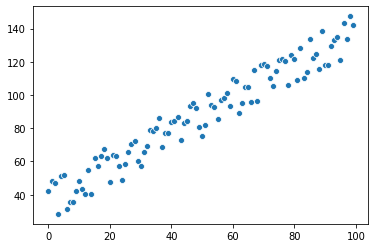

In [7]:
sns.scatterplot(x=x[:, 1], y=y)

plt.show()

In [8]:
x
theta = np.array([1.90595185,1.5342646])
np.dot(x, theta).shape

(100,)

In [17]:
x.transpose().shape

(2, 100)

__Your Turn__

Write a gradient descent function for this linear problem

- Inputs:
x, y, theta: initialized with some random values, alpha: learning rate, m: length of data, numiterations: number of iterations

- return: plot the errors for each iterations
- return the final theta values

In [10]:
# %load -r 1-20 supplement.py
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        if i % (numIterations // 40) == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
            print(theta)
        costs.append(cost)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y=costs, x=[i for i in range(len(costs))])

    return theta

Iteration 0 | Cost: 474.525031
[37.9595185  1.5342646]
Iteration 5000 | Cost: 29.427823
[37.96429855  1.01350909]
Iteration 10000 | Cost: 29.427575
[37.97542237  1.01334138]
Iteration 15000 | Cost: 29.427383
[37.98522089  1.01319365]
Iteration 20000 | Cost: 29.427234
[37.99385202  1.01306352]
Iteration 25000 | Cost: 29.427118
[38.00145482  1.0129489 ]
Iteration 30000 | Cost: 29.427028
[38.00815182  1.01284793]
Iteration 35000 | Cost: 29.426958
[38.01405094  1.01275899]
Iteration 40000 | Cost: 29.426904
[38.01924724  1.01268065]
Iteration 45000 | Cost: 29.426862
[38.02382444  1.01261164]
Iteration 50000 | Cost: 29.426830
[38.02785631  1.01255086]
Iteration 55000 | Cost: 29.426804
[38.03140783  1.01249731]
Iteration 60000 | Cost: 29.426785
[38.03453621  1.01245015]
Iteration 65000 | Cost: 29.426770
[38.03729188  1.0124086 ]
Iteration 70000 | Cost: 29.426758
[38.03971924  1.012372  ]
Iteration 75000 | Cost: 29.426749
[38.0418574   1.01233977]
Iteration 80000 | Cost: 29.426742
[38.04374081

array([38.0570027 ,  1.01211143])

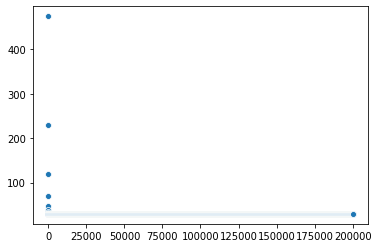

In [15]:
numIterations = 200000
alpha = 0.0001
theta = np.array([37.9595185,1.5342646])
a = gradientDescent(x, y, theta, alpha, m, numIterations)
a

Let's compare the results with the sklearn.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression(fit_intercept= False)
lr.fit(x,y)
print(lr.coef_)


[38.05766576  1.01210143]
